In [2]:
from tssb.utils import load_time_series_segmentation_datasets
from tssb.evaluation import covering
from claspy.segmentation import BinaryClaSPSegmentation
import pandas as pd
import bocd
import matplotlib.pyplot as plt
import numpy as np

tssb = load_time_series_segmentation_datasets()

In [3]:
tssb = load_time_series_segmentation_datasets(names=["ArrowHead", "InlineSkate", "Plane"])
data = pd.read_csv('ArrowHead.txt', header=None)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'ArrowHead.txt'

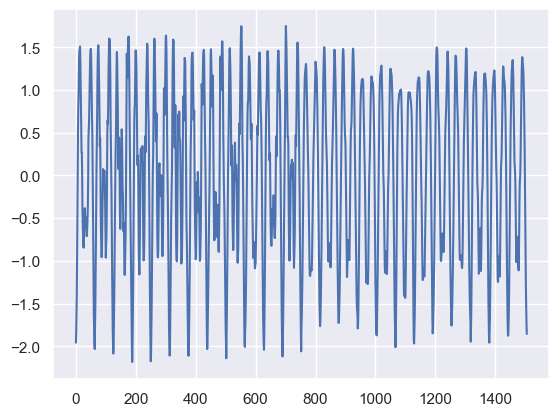

In [27]:
plt.plot(data)

In [28]:
bc = bocd.BayesianOnlineChangePointDetection(bocd.ConstantHazard(300), bocd.StudentT(mu=0, kappa=1, alpha=1, beta=1))

rt_mle = np.empty(data.shape)
for i, d in enumerate(data):
    bc.update(d)
    rt_mle[i] = bc.rt

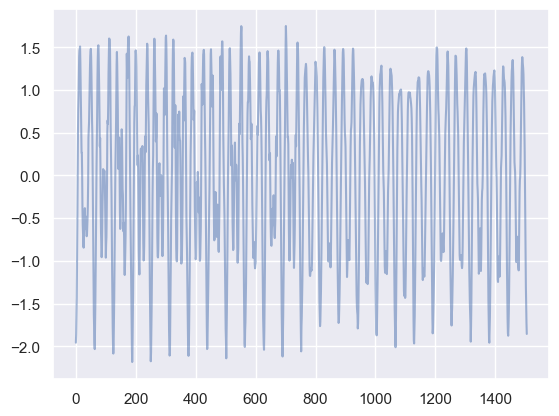

In [29]:
plt.plot(data, alpha=0.5, label="observation")
index_changes = np.where(np.diff(rt_mle)<0)[0]
plt.scatter(index_changes, data[index_changes], c='green', label="change point")